In [25]:
!python -V

Python 3.6.9 :: Anaconda, Inc.


In [86]:
import pandas as pd
import numpy as np
import gc

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
%load_ext wurlitzer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from MulticoreTSNE import MulticoreTSNE as TSNE
from featexp import get_univariate_plots
from featexp import univariate_plotter
from featexp import get_trend_stats

pd.set_option('display.max_columns', None)

def downcast_dtypes(df):
    '''
        Changes column types in the dataframe:         
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    return df

The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [100]:
df_train = pd.read_csv('onetwotrip_challenge_train.csv')
df = downcast_dtypes(df_train)
del df_train
gc.collect()

cols_to_rename = {'field0': 'days_from_last',
                 'field2': 'month_buy',
                 'field3': 'month_depart',
                 'field4': 'order_of_buy',
                 'field9': 'ticket_child_1y',
                 'field11': 'hour_depart',
                 'field15': 'total_tickets',
                 'field16': 'days_before_depart',
                 'field18': 'dow_buy',
                 'field20': 'dow_depart',
                 'field21': 'year',
                 'field24': 'ticket_adult',
                 'field28': 'ticket_child_4y',
                 'field29': 'quarter'};

df.rename(columns=cols_to_rename, inplace=True)

In [101]:
df['unq'] = df.userid.map(df.groupby('userid').size())
df['order_of_buy_invert'] = df.unq-df.order_of_buy

df['diff_month'] = (df.month_depart - df.month_buy)
df['diff_hour'] = df.field23 - df.hour_depart

In [102]:
df_new = downcast_dtypes(df)
del df
gc.collect()

102

In [103]:
train, test = train_test_split(df_new, stratify=df_new.goal1, random_state=17)

In [90]:
test.head()

,orderid,userid,days_from_last,field1,month_buy,month_depart,order_of_buy,field5,field6,field7,field8,ticket_child_1y,field10,hour_depart,field12,field13,field14,total_tickets,days_before_depart,field17,dow_buy,field19,dow_depart,year,field22,field23,ticket_adult,field25,field26,field27,ticket_child_4y,quarter,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
72830,72830,2c8243528a154376a9b62402cac388279faa3bb14f413a...,10,-0.548937,3,4,5,0,4,1,0,0,1,14,4,3,-0.381176,1,26,1,4,3,2,2,40,20,1,1,5,3,0,1,1,1,0,1,1,0,0,0,0,1,0
36073,36073,8530a069db522c88b21eacfb1174aba5a3e4c1ca0c4c4e...,0,-0.471365,8,9,1,1,0,1,1,0,1,11,8,20,-0.381176,1,29,1,5,3,6,1,1,6,1,1,1,1,0,3,1,1,1,1,1,0,0,0,0,0,0
50178,50178,7bc96312bb2c8c26a380310b82a4e5d1d312f4cd5cf573...,1,0.381920,7,7,3,0,0,1,1,0,0,13,8,5,0.039024,2,1,1,6,3,7,1,1,6,2,1,5,3,0,3,1,1,0,0,0,0,0,0,0,0,0
68830,68830,8230c9958391aa5a916f237aca3966e71af48b8e95a4e4...,0,-0.005937,10,10,1,1,12,1,0,0,1,19,4,4,0.319156,1,26,1,1,3,6,1,82,18,1,1,3,1,0,4,1,1,0,1,1,0,0,0,0,0,0
25638,25638,ba6c0f141bba59bcbb57b33ea641f6539e8ceaf39cde95...,0,7.130628,11,4,1,1,17,2,0,0,1,1,128,3,6.201945,2,147,1,4,4,3,1,107,18,2,36,3,1,0,4,1,1,0,0,0,0,0,0,0,0,0


In [91]:
X = test.drop(columns=['goal1', 'orderid', 'userid'], axis=1).copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
X_scaled.shape

(49014, 40)

# t-SNE

In [27]:
tsne_repr = TSNE(n_jobs=4).fit_transform(X_scaled)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

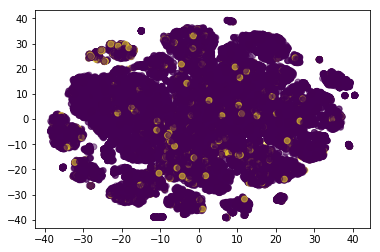

In [29]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=test['goal1'], alpha=.5);

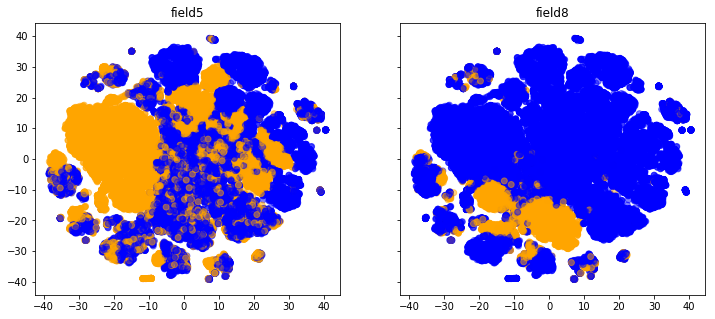

In [30]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['field5', 'field8']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=test[name].map({0: 'orange', 1: 'blue'}), alpha=.5);
    axes[i].set_title(name);

# PCA

In [32]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

In [45]:
df_pca = test.copy()
df_pca['pca-one'] = pca_result[:,0]
df_pca['pca-two'] = pca_result[:,1] 
df_pca['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.08973803 0.08788648 0.06029076]


In [35]:
pca_frame = pd.DataFrame({'pca-one': pca_result[:,0],
                          'pca-two': pca_result[:,1],
                          'pca-three': pca_result[:,2]})

In [46]:
df_pca.head(2)

,orderid,userid,days_from_last,field1,month_buy,month_depart,order_of_buy,field5,field6,field7,field8,ticket_child_1y,field10,hour_depart,field12,field13,field14,total_tickets,days_before_depart,field17,dow_buy,field19,dow_depart,year,field22,field23,ticket_adult,field25,field26,field27,ticket_child_4y,quarter,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,unq,order_of_buy_invert,diff_month,diff_hour,pca-one,pca-two,pca-three
72830,72830,2c8243528a154376a9b62402cac388279faa3bb14f413a...,10,-0.548937,3,4,5,0,4,1,0,0,1,14,4,3,-0.381176,1,26,1,4,3,2,2,40,20,1,1,5,3,0,1,1,1,0,1,1,0,0,0,0,1,0,8,3,1,6,-1.344641,3.054961,1.387387
36073,36073,8530a069db522c88b21eacfb1174aba5a3e4c1ca0c4c4e...,0,-0.471365,8,9,1,1,0,1,1,0,1,11,8,20,-0.381176,1,29,1,5,3,6,1,1,6,1,1,1,1,0,3,1,1,1,1,1,0,0,0,0,0,0,1,0,1,-5,-0.943453,-1.307305,-0.104577


In [47]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df_pca.shape[0])

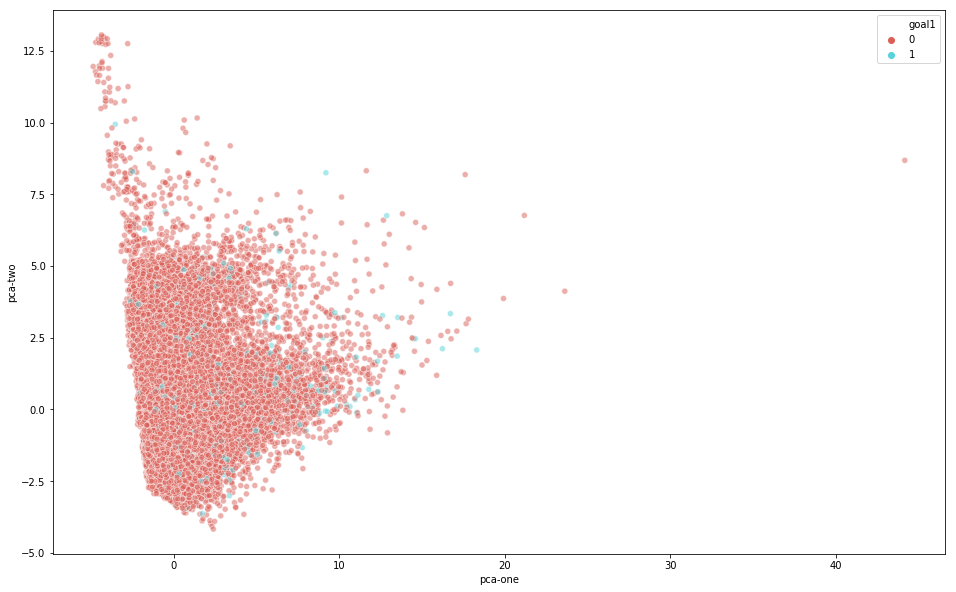

In [68]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="goal1",
    palette=sns.color_palette("hls", 2),
    data=df_pca, #.loc[rndperm,:],
    legend="full",
    alpha=0.5
)

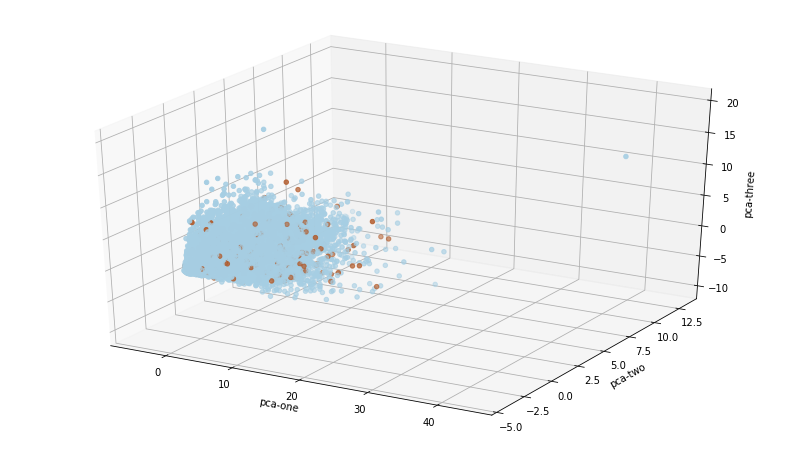

In [69]:
ax = plt.figure(figsize=(14,8)).gca(projection='3d')
ax.scatter(
    xs=df_pca["pca-one"], 
    ys=df_pca["pca-two"], 
    zs=df_pca["pca-three"], 
    c=df_pca["goal1"], 
    cmap='Paired'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [72]:
df_pca['tsne-2d-one'] = tsne_repr[:,0]
df_pca['tsne-2d-two'] = tsne_repr[:,1] 

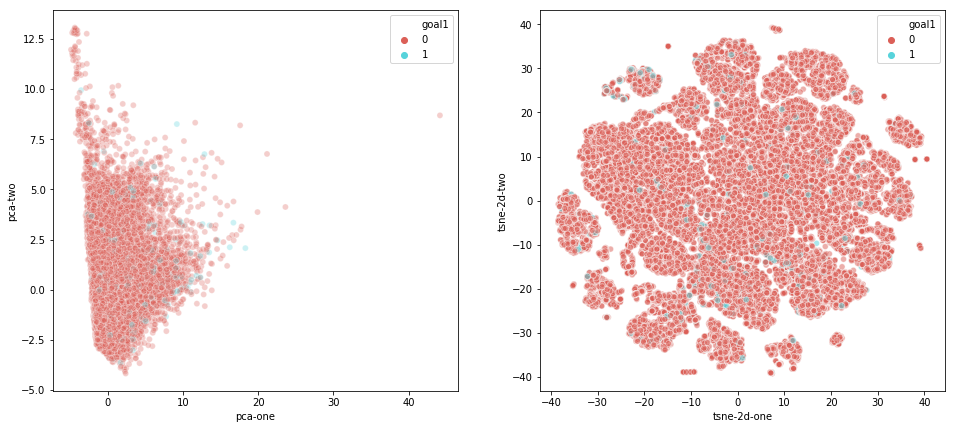

In [74]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="goal1",
    palette=sns.color_palette("hls", 2),
    data=df_pca,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="goal1",
    palette=sns.color_palette("hls", 2),
    data=df_pca,
    legend="full",
    alpha=0.5,
    ax=ax2
)

# tSNE_PCA

In [96]:
pca_15 = PCA(n_components=15)
pca_result_15 = pca_15.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.\
      format(np.sum(pca_15.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8596520990575093


In [97]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_15)

In [80]:
pca_result_15.shape

(49014, 15)

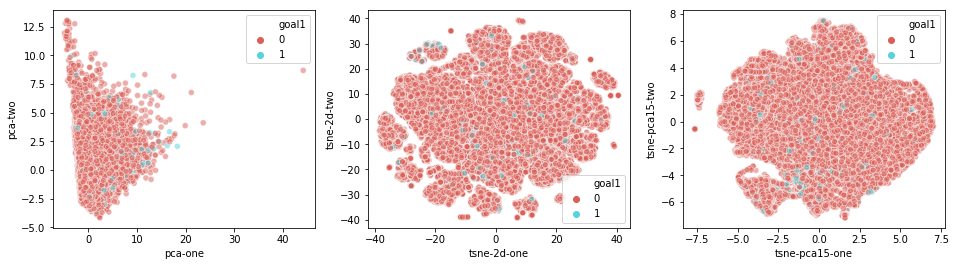

In [85]:
df_pca['tsne-pca15-one'] = tsne_pca_results[:,0]
df_pca['tsne-pca15-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="goal1",
    palette=sns.color_palette("hls", 2),
    data=df_pca,
    legend="full",
    alpha=0.5,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="goal1",
    palette=sns.color_palette("hls", 2),
    data=df_pca,
    legend="full",
    alpha=0.5,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca15-one", y="tsne-pca15-two",
    hue="goal1",
    palette=sns.color_palette("hls", 2),
    data=df_pca,
    legend="full",
    alpha=0.5,
    ax=ax3
)

# featexp

                                            Plots for unq                                             
                                           Train data plots                                           


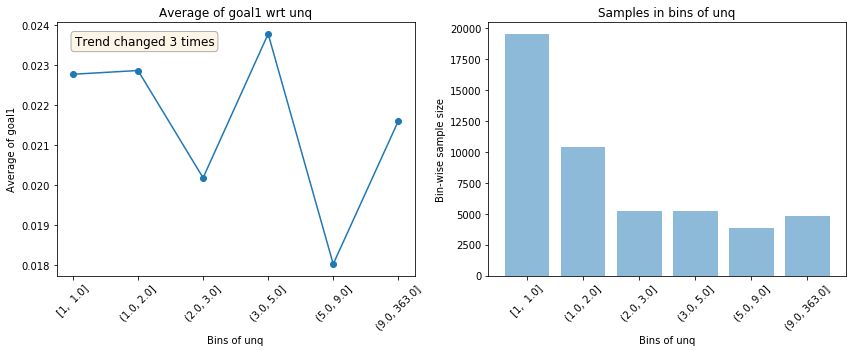

                                           Test data plots                                            


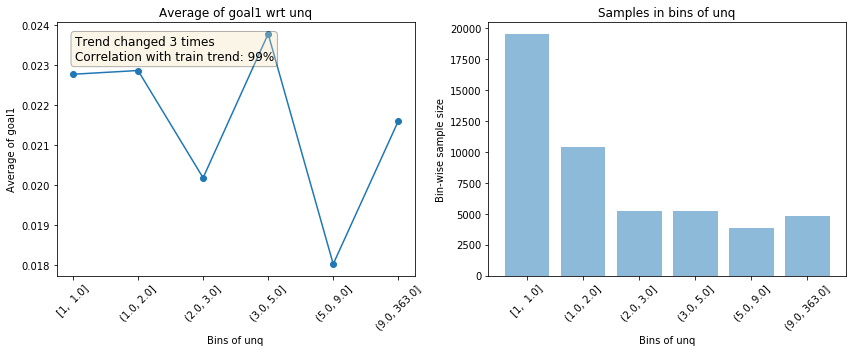

--------------------------------------------------------------------------------------------------------------




In [104]:
get_univariate_plots(data=test, target_col='goal1', 
                     data_test=test, features_list=['unq'])

                                          Plots for field12                                           
                                           Train data plots                                           


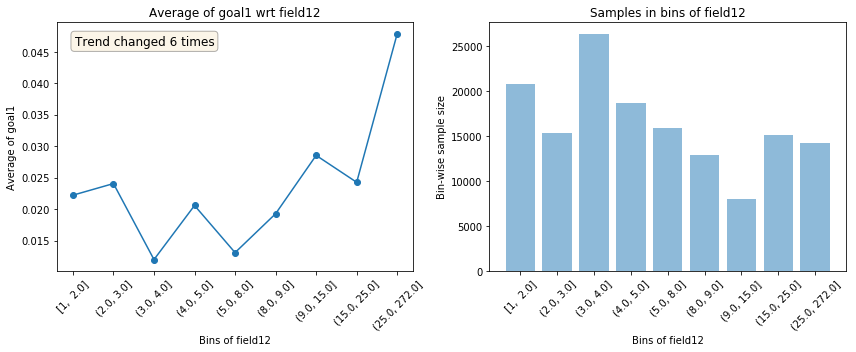

                                           Test data plots                                            


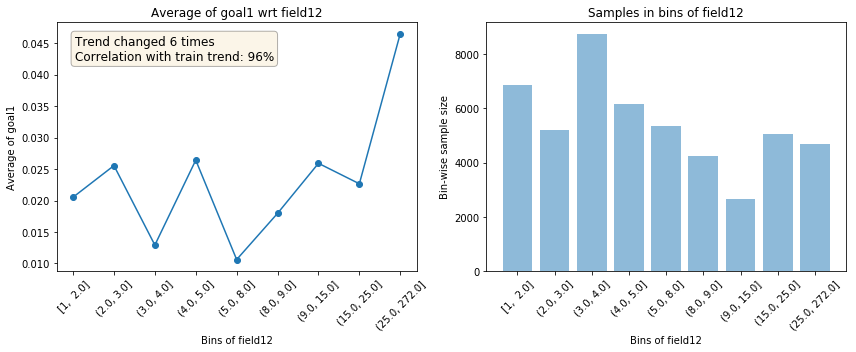

--------------------------------------------------------------------------------------------------------------


                                          Plots for field12                                           


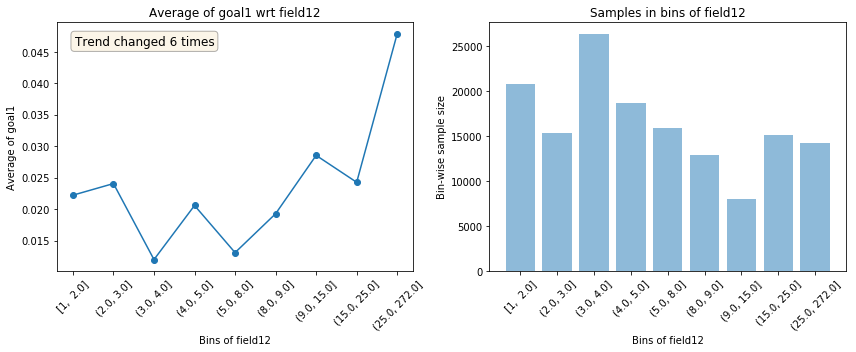

--------------------------------------------------------------------------------------------------------------




In [105]:
binned_data_train, binned_data_test = univariate_plotter(data=train, target_col='goal1', 
                                                         feature='field12', data_test=test)
# For only train data
binned_data_train = univariate_plotter(data=train, target_col='goal1', feature='field12')

In [106]:
binned_data_train

,field12,Samples_in_bin,goal1_mean,field12_mean
0,"[1, 2.0]",20804,0.022207,1.649058
1,"(2.0, 3.0]",15301,0.024051,3.000000
2,"(3.0, 4.0]",26296,0.011979,4.000000
3,"(4.0, 5.0]",18620,0.020569,5.000000
4,"(5.0, 8.0]",15898,0.013083,7.943515
5,"(8.0, 9.0]",12876,0.019261,9.000000
6,"(9.0, 15.0]",7992,0.028529,12.625626
7,"(15.0, 25.0]",15089,0.024256,20.235337
8,"(25.0, 272.0]",14166,0.047861,59.109558


In [31]:
stats = get_trend_stats(data=test, target_col='goal1', data_test=test)

# data_test is optional. If not passed, trend correlations aren't calculated.
stats

Categorical features ['userid'] ignored. Categorical features not supported yet.
Returning stats for all numeric features


,Feature,Trend_changes
0,orderid,6
1,days_from_last,2
2,field1,5
3,month_buy,5
4,month_depart,3
5,order_of_buy,1
6,field5,0
7,field6,0
8,field7,0
9,field8,0
